# Classifying Text - Multinomial Naive Bayes Classification
One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.Here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

In [7]:
# Downloading and describing the dataset
from sklearn.datasets import fetch_20newsgroups
text_data= fetch_20newsgroups()

In [8]:
print("Keys : \n{}".format(text_data.keys()))
text_data.target_names


Keys : 
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
text_data.data[:1]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"]

In [11]:
#We will select just a few of these categories, and download the training and testing set:
categories= ['sci.space','rec.sport.hockey','rec.motorcycles','rec.sport.baseball']
train = fetch_20newsgroups(subset='train',categories= categories)
test = fetch_20newsgroups(subset='test',categories=categories)
print(train.data[5])
print(test.data[5])

From: downey@homer.CS.Berkeley.EDU (Allen B. Downey)
Subject: Re: Speeding ticket from CHP
Organization: University of California, Berkeley
Lines: 13
Distribution: world
NNTP-Posting-Host: homer.cs.berkeley.edu

Paraphrase of initial post:

	Can I fight a speeding ticket in court?

My reply:

       Fight your ticket : California edition by David Brown 1st ed.
       Berkeley, CA : Nolo Press, 1982

The second edition is out (but not in UCB's library).  Good luck; let
us know how it goes.

ABD

From: davet@interceptor.cds.tek.com (Dave Tharp CDS)
Subject: Re: Looking for MOVIES w/ BIKES
Organization: Tektronix - Colorado Data Systems, Englewood, CO
Lines: 15

"Silver Dream Racer" -- Frustrated Brit club racer's buddy dies,
leaving him a built-in-garage "revolutionary, experimental" 500 GP bike.
Brit club racer uses machine to beat Bad American on Bad Japanese
Factory Bike at British GP.  Filmed at Silverstone, I believe.  Pretty
bad.

---------------------------------------------------

#### In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


In [13]:
model.fit(train.data,train.target)
labels=model.predict(test.data)


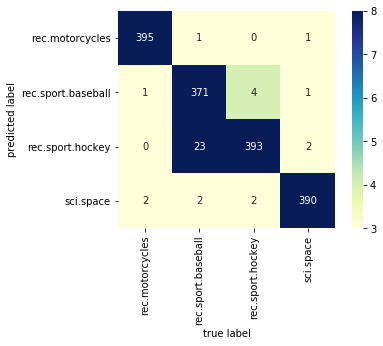

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu",vmin=3,vmax=8,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

We can see that our classifier works pretty well except for baseball and hockey as both are under sports category.

##### Lets try to predict text using the classifier

In [15]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [16]:
predict_category("rocket")

'sci.space'

In [17]:
predict_category("I love to ride")

'rec.motorcycles'